In [1]:
import keras
from keras.datasets import mnist
import numpy as np
(X_train, y_train), (X_test, y_test) = mnist.load_data()

x_train = X_train.astype('float32') / 255.0
x_test = X_test.astype('float32') / 255.0

x_train = x_train.reshape((x_train.shape[0], 28, 28, 1))
x_test = x_test.reshape((x_test.shape[0], 28, 28, 1))




2024-10-28 16:36:57.126651: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:485] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2024-10-28 16:36:57.140760: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:8454] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2024-10-28 16:36:57.145199: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1452] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2024-10-28 16:36:57.155506: I tensorflow/core/platform/cpu_feature_guard.cc:210] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2024-10-28 16:36:57.852562: W tensorflow/compiler/tf2

In [2]:
from keras import layers

model = keras.models.Sequential()
model.add(layers.Conv2D(32, (3, 3), activation='relu', padding='same', input_shape=(28, 28, 1)))
model.add(layers.MaxPooling2D((2, 2), padding='same'))  # Output shape: (14, 14, 32)
model.add(layers.Conv2D(16, (3, 3), activation='relu', padding='same'))
model.add(layers.MaxPooling2D((2, 2), padding='same'))  # Output shape: (7, 7, 16)
model.add(layers.Conv2D(8, (3, 3), activation='relu', padding='same'))
model.add(layers.MaxPooling2D((2, 2), padding='same'))  # Output shape: (4, 4, 8)
model.add(layers.Conv2D(8, (3, 3), activation='relu', padding='same'))
model.add(layers.UpSampling2D((2, 2)))  # Output shape: (8, 8, 8)
model.add(layers.Conv2D(16, (3, 3), activation='relu', padding='same'))
model.add(layers.UpSampling2D((2, 2)))  # Output shape: (16, 16, 16)
model.add(layers.Conv2D(32, (3, 3), activation='relu', padding='same'))
model.add(layers.UpSampling2D((2, 2)))  # Output shape: (32, 32, 32)
model.add(layers.Cropping2D(((2, 2), (2, 2))))
model.add(layers.Conv2D(1, (3, 3), activation='sigmoid', padding='same'))  # Output shape: (28, 28, 1)


# Compile the model
model.compile(optimizer='adam', loss='binary_crossentropy')

/home/shawn/Documents/CSCIE89Project3/venv/lib/python3.12/site-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)
I0000 00:00:1730158618.800207  729936 cuda_executor.cc:1015] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero. See more at https://github.com/torvalds/linux/blob/v6.0/Documentation/ABI/testing/sysfs-bus-pci#L344-L355
I0000 00:00:1730158618.833167  729936 cuda_executor.cc:1015] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero. See more at https://github.com/torvalds/linux/blob/v6.0/Documentation/ABI/testing/sysfs-bus-pci#L344-L355
I0000 00:00:1730158618.

In [3]:
history = model.fit(x_train, x_train,
                epochs=10,
                batch_size=128,
                validation_data=(x_test, x_test))

Epoch 1/10


I0000 00:00:1730158621.589982  730116 service.cc:146] XLA service 0x77534000cbc0 initialized for platform CUDA (this does not guarantee that XLA will be used). Devices:
I0000 00:00:1730158621.590009  730116 service.cc:154]   StreamExecutor device (0): NVIDIA GeForce RTX 3060, Compute Capability 8.6
2024-10-28 16:37:01.635453: I tensorflow/compiler/mlir/tensorflow/utils/dump_mlir_util.cc:268] disabling MLIR crash reproducer, set env var `MLIR_CRASH_REPRODUCER_DIRECTORY` to enable.
2024-10-28 16:37:01.857026: I external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:531] Loaded cuDNN version 8907


 51/469 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.5223

I0000 00:00:1730158624.173839  730116 device_compiler.h:188] Compiled cluster using XLA!  This line is logged at most once for the lifetime of the process.


469/469 ━━━━━━━━━━━━━━━━━━━━ 9s 11ms/step - loss: 0.2833 - val_loss: 0.1338
Epoch 2/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - loss: 0.1272 - val_loss: 0.1146
Epoch 3/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - loss: 0.1143 - val_loss: 0.1085
Epoch 4/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - loss: 0.1084 - val_loss: 0.1042
Epoch 5/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - loss: 0.1044 - val_loss: 0.1011
Epoch 6/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - loss: 0.1020 - val_loss: 0.0989
Epoch 7/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - loss: 0.0995 - val_loss: 0.0973
Epoch 8/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - loss: 0.0983 - val_loss: 0.0974
Epoch 9/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - loss: 0.0970 - val_loss: 0.0951
Epoch 10/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - loss: 0.0957 - val_loss: 0.0938


In [4]:
history

In [5]:
history.history

{'loss': [0.1952507495880127,
  0.12280307710170746,
  0.1125708594918251,
  0.10732053220272064,
  0.10380767285823822,
  0.10126247256994247,
  0.09945975244045258,
  0.09789256751537323,
  0.09662006050348282,
  0.09550593048334122],
 'val_loss': [0.1337650865316391,
  0.11458119750022888,
  0.1085386574268341,
  0.10417935997247696,
  0.10114429146051407,
  0.09887520968914032,
  0.09730406850576401,
  0.09743127971887589,
  0.09508774429559708,
  0.09378009289503098]}

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step


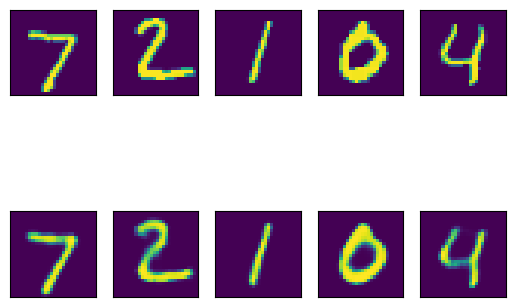

In [6]:
import matplotlib.pyplot as plt
imgs = model.predict(x_test)
for i in range(5):
    ax = plt.subplot(2, 5, i + 1)
    plt.imshow(x_test[i])
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
    ax_2 = plt.subplot(2, 5, i + 6)
    plt.imshow(imgs[i])
    ax_2.get_xaxis().set_visible(False)
    ax_2.get_yaxis().set_visible(False)
plt.show()


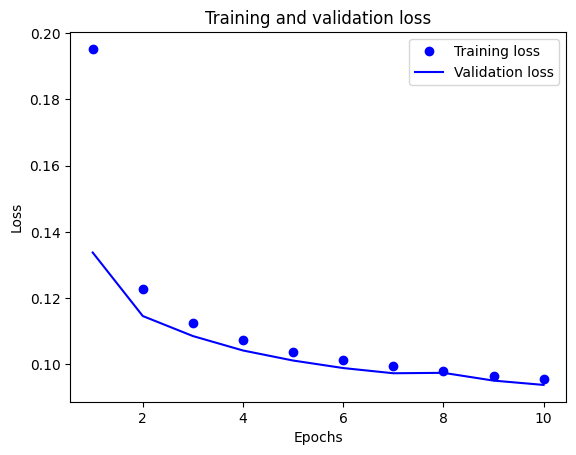

In [10]:
import matplotlib.pyplot as plt

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(1, len(loss) + 1)


# "bo" is for "blue dot"
plt.plot(epochs, loss, 'bo', label='Training loss')
# b is for "solid blue line"
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.show()